In [4]:
from astropy.io import ascii
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
import numpy as np

In [6]:
t = ascii.read('students_stats_oct1723.txt')
t2 = ascii.read("students_foreign_stats_oct1723.txt")

In [29]:
years = []
with open("chandraphds_stats_mar1924.txt") as f:
    for line in f.readlines()[1:]:
        years.append(int(line.strip().split()[-1]))
phds = np.bincount(years)[1999:]
years = np.arange(1999, 2024)


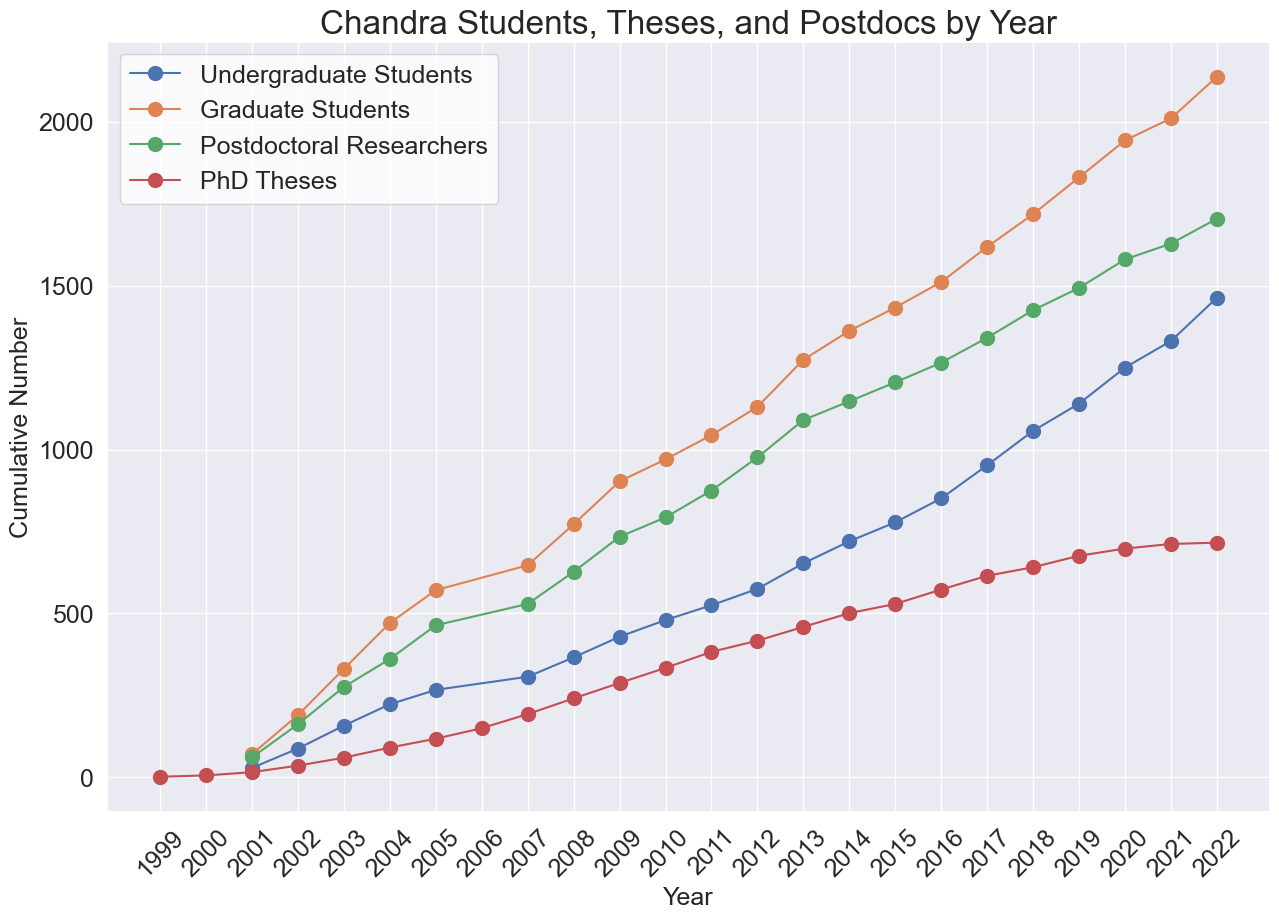

In [35]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(t["Year"], np.cumsum(t["UG"]+t2["UG"]), marker="o", markersize=10, linestyle="-", 
        color="C0", label="Undergraduate Students")
ax.plot(t["Year"], np.cumsum(t["GR"]+t2["GR"]), marker="o", markersize=10, linestyle="-", 
        color="C1", label="Graduate Students")
ax.plot(t["Year"], np.cumsum(t["PD"]+t2["PD"]), marker="o", markersize=10, linestyle="-", 
        color="C2", label="Postdoctoral Researchers")
ax.plot(years[:-1], np.cumsum(phds[:-1]), marker="o", markersize=10, linestyle="-", 
        color="C3", label="PhD Theses")
ax.set_title("Chandra Students, Theses, and Postdocs by Year", size=24)
ax.set_xticks(years[:-1])
ax.set_xticklabels(years[:-1], rotation=45, fontdict={"fontsize": 18})
ax.tick_params(axis="y", labelsize=18)
ax.set_ylabel("Cumulative Number", size=18)
ax.set_xlabel("Year", size=18)
ax.legend(fontsize=18, facecolor="white")
fig.savefig("../images/students.png", bbox_inches="tight")